In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split



En aquesta fase es realitzaran les seguentes tasques:
1 -Carrega les dades
2- Nom y nombre d'atributs
3- Nombre de files
4- Verifica missing values

In [76]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('accident.csv',delimiter=',', na_values=['NA'],encoding="ISO-8859-1")

#Es mostren els registres de la part superior
df.head()

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,COUNTY,COUNTYNAME,CITY,CITYNAME,DAY,DAYNAME,MONTH,MONTHNAME,YEAR,DAY_WEEK,DAY_WEEKNAME,HOUR,HOURNAME,MINUTE,MINUTENAME,NHS,NHSNAME,ROUTE,ROUTENAME,TWAY_ID,TWAY_ID2,RUR_URB,RUR_URBNAME,FUNC_SYS,FUNC_SYSNAME,RD_OWNER,RD_OWNERNAME,MILEPT,MILEPTNAME,LATITUDE,LATITUDENAME,LONGITUD,LONGITUDNAME,SP_JUR,SP_JURNAME,HARM_EV,HARM_EVNAME,MAN_COLL,MAN_COLLNAME,RELJCT1,RELJCT1NAME,RELJCT2,RELJCT2NAME,TYP_INT,TYP_INTNAME,WRK_ZONE,WRK_ZONENAME,REL_ROAD,REL_ROADNAME,LGT_COND,LGT_CONDNAME,WEATHER,WEATHERNAME,SCH_BUS,SCH_BUSNAME,RAIL,RAILNAME,NOT_HOUR,NOT_HOURNAME,NOT_MIN,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS,DRUNK_DR
0,1,Alabama,10001,1,1,0,0,4,4,0,51,ELMORE (51),0,NOT APPLICABLE,1,1,1,January,2020,4,Wednesday,2,2:00am-2:59am,58,58,0,This section IS NOT on the NHS,4,County Road,cr-4,NaN,1,Rural,5,Major Collector,2,County Highway Agency,0,None,32.433133,32.43313333,-86.094850,-86.09485,0,No Special Jurisdiction,42,Tree (Standing Only),0,The First Harmful Event was Not a Collision wi...,0,No,1,Non-Junction,1,Not an Intersection,0,None,4,On Roadside,2,Dark - Not Lighted,1,Clear,0,No,0000000,Not Applicable,99,Unknown,99,Unknown,3,3:00am-3:59am,10,10,99,Unknown,99,Unknown EMS Hospital Arrival Time,3,1
1,1,Alabama,10002,4,4,0,0,6,6,0,73,JEFFERSON (73),350,BIRMINGHAM,2,2,1,January,2020,5,Thursday,17,5:00pm-5:59pm,18,18,0,This section IS NOT on the NHS,6,Local Street - Municipality,martin luther king jr dr,NaN,2,Urban,4,Minor Arterial,4,City or Municipal Highway Agency,0,None,33.484658,33.48465833,-86.839544,-86.83954444,0,No Special Jurisdiction,12,Motor Vehicle In-Transport,6,Angle,0,No,1,Non-Junction,1,Not an Intersection,0,None,1,On Roadway,3,Dark - Lighted,2,Rain,0,No,0000000,Not Applicable,17,5:00pm-5:59pm,18,18,17,5:00pm-5:59pm,26,26,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
2,1,Alabama,10003,2,2,0,0,2,2,0,117,SHELBY (117),0,NOT APPLICABLE,2,2,1,January,2020,5,Thursday,14,2:00pm-2:59pm,55,55,0,This section IS NOT on the NHS,3,State Highway,sr-76,us-280,1,Rural,4,Minor Arterial,1,State Highway Agency,49,49,33.299942,33.29994167,-86.369642,-86.36964167,0,No Special Jurisdiction,34,Ditch,0,The First Harmful Event was Not a Collision wi...,0,No,3,Intersection-Related,3,T-Intersection,0,None,4,On Roadside,1,Daylight,2,Rain,0,No,0000000,Not Applicable,14,2:00pm-2:59pm,58,58,15,3:00pm-3:59pm,15,15,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
3,1,Alabama,10004,1,1,0,0,5,5,0,15,CALHOUN (15),0,NOT APPLICABLE,3,3,1,January,2020,6,Friday,15,3:00pm-3:59pm,20,20,0,This section IS NOT on the NHS,4,County Road,CR-ALEXANDRIA WELLINGTON RD,NaN,1,Rural,7,Local,2,County Highway Agency,0,None,33.795072,33.79507222,-85.883486,-85.88348611,0,No Special Jurisdiction,42,Tree (Standing Only),0,The First Harmful Event was Not a Collision wi...,0,No,1,Non-Junction,1,Not an Intersection,0,None,4,On Roadside,1,Daylight,10,Cloudy,0,No,0000000,Not Applicable,99,Unknown,99,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
4,1,Alabama,10005,1,1,0,0,1,1,0,37,COOSA (37),0,NOT APPLICABLE,4,4,1,January,2020,7,Saturday,0,0:00am-0:59am,45,45,0,This section IS NOT on the NHS,4,County Road,CR-63,NaN,1,Rural,5,Major Collector,2,County Highway Agency,0,None,32.848414,32.84841389,-86.083547,-86.08354722,0,No Special Jurisdiction,42,Tree (Standing Only),0,The First Harmful Event was Not a Collision wi...,0,No,1,Non-Junction,1,Not an Intersection,0,None,4,On Roadside,2,Dark - Not Lighted,2,Rain,0,No,0000000,Not Applicable,0,0:00am-0:59am,45,45,0,0:00am-0:59am,55,55,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0


In [49]:
#Es mostren la cuantitat de variables del dataset

nombre_atributs = len (df.columns)

print("El dataset te "+ str(nombre_atributs) + " variables")

El dataset te 81 variables


Aquí tenim una explicació de cada variable



+ **ST_CASE**  identificador d'accident

**FETS A ESTUDIAR**

+ **FATALS** morts 
+ **DRUNK_DR** conductors beguts
+ **VE_TOTAL** nombre de vehicles implicats en total 
+ **VE_FORMS** nombre de vehicles en moviment implicats
+ **PVH_INVL** nombre de vehicles estacionats implicats
+ **PEDS**     nombre de vianants implicats
+ **PERSONS**  nombre d'ocupant de vehicle implicats
+ **PERMVIT**  nombre conductors i ocupants implicats
+ **PERNOTMVIT** nombre vianants, ciclistes, a cavall... qualsevol cosa menys vehicle motoritzat

**DIMENSIÓ GEOGRÀFICA**

+ **STATE** codificació d'estat
+ **STATENAME** nom d'estat
+ **COUNTY** identificador de contat
+ **COUNTYNAME** comtat
+ **CITY** identificador de ciutat
+ **CITYNAME** ciutat
+ **NHS** 1 ha passat a autopista del NHS 0 no
+ **NHSNAME** TBD
+ **ROUTE**  identificador de ruta
+ **ROUTENAME** ruta
+ **TWAY_ID** via de transit (1982) 
+ **TWAY_ID2** via de transit (2004)
+ **RUR_URB** identificador de segment rural o urbà
+ **RUR_URBNAME** segment rural o urbà
+ **FUNC_SYS** classificació funcional segment
+ **FUNC_SYSNAME** TBD
+ **RD_OWNER** identificador propietari del segment     
+ **RD_OWNERNAME** propietari del segment 
+ **MILEPT** milla int
+ **MILEPTNAME** milla chr
+ **LATITUDE** latitud int    
+ **LATITUDENAME** latitud chr
+ **LONGITUD** longitud int
+ **LONGITUDNAME** longitud chr
+ **SP_JUR** codi jurisdicció
+ **SP_JURNAME** jurisdicció

**DIMENSIÓ TEMPORAL**

+ **DAY** dia         
+ **DAYNAME** dia repetit
+ **MONTH** mes    
+ **MONTHNAME** nom de mes
+ **YEAR** any
+ **DAY_WEEK** dia de la setmana    
+ **DAY_WEEKNAME** nom de dia de la setmana
+ **HOUR** hora
+ **HOURNAME** franja hora
+ **MINUTE** minut int
+ **MINUTENAME** minut chr

**DIMENSIÓ CONDCICIONS ACCIDENT**

+ **HARM_EV** codi primer esdeveniment de l'accident que produeixi danys o lesions
+ **HARM_EVNAME** primer esdeveniment de l'accident que produeixi danys o lesions
+ **MAN_COLL** codi de posició dels vehicles 
+ **MAN_COLLNAME** posició dels vehicles
+ **RELJCT1** codi si hi ha àrea d'intercanvi
+ **RELJCT1NAME**  si hi ha àrea d'intercanvi
+ **RELJCT2** codi proximitat encreuament
+ **RELJCT2NAME** proximitat encreuament
+ **TYP_INT** codi tipus d'intersecció
+ **TYP_INTNAME** tipus d'intersecció
+ **WRK_ZONE** codi tipologia d'obres     
+ **WRK_ZONENAME** tipologia d'obres
+ **REL_ROAD**     codi ubicació vehicle a la via
+ **REL_ROADNAME** ubicació vehicle a la via
+ **LGT_COND**     codi condició lumínica
+ **LGT_CONDNAME** condició lumínica

**DIMENSIÓ METEREOLOGIA**

+ **WEATHER**     codi temps
+ **WEATHERNAME** : temps

**ALTRES**

+ **SCH_BUS** codi si vehicle escolar implicat
+ **SCH_BUSNAME** vehicle escolar implicat
+ **RAIL** codi si dins o a prop pas ferroviari
+ **RAILNAME**  si dins o a prop pas ferroviari

**DIMENSIÓ SERVEI EMERGENCIES**

+ **NOT_HOUR** hora notificació a emergències int
+ **NOT_HOURNAME** hora notificació a emergències franja 
+ **NOT_MIN** minut notificació a emergències int
+ **NOT_MINNAME** minut notificació a emergències chr
+ **ARR_HOUR** hora arribada emergències int
+ **ARR_HOURNAME** hora arribada emergències franja
+ **ARR_MIN** minut arribada emergències int
+ **ARR_MINNAME** minut arribada emergències franja 
+ **HOSP_HR** hora arribada hospital int
+ **HOSP_HRNAME** hora arribada hospital franja
+ **HOSP_MN** minut arribada hospital int
+ **HOSP_MNNAME** : minut arribada hospital franja


In [50]:
#Es mostren per pantalla el nom dels atributs

for col in df.columns:
    print(col)

STATE
STATENAME
ST_CASE
VE_TOTAL
VE_FORMS
PVH_INVL
PEDS
PERSONS
PERMVIT
PERNOTMVIT
COUNTY
COUNTYNAME
CITY
CITYNAME
DAY
DAYNAME
MONTH
MONTHNAME
YEAR
DAY_WEEK
DAY_WEEKNAME
HOUR
HOURNAME
MINUTE
MINUTENAME
NHS
NHSNAME
ROUTE
ROUTENAME
TWAY_ID
TWAY_ID2
RUR_URB
RUR_URBNAME
FUNC_SYS
FUNC_SYSNAME
RD_OWNER
RD_OWNERNAME
MILEPT
MILEPTNAME
LATITUDE
LATITUDENAME
LONGITUD
LONGITUDNAME
SP_JUR
SP_JURNAME
HARM_EV
HARM_EVNAME
MAN_COLL
MAN_COLLNAME
RELJCT1
RELJCT1NAME
RELJCT2
RELJCT2NAME
TYP_INT
TYP_INTNAME
WRK_ZONE
WRK_ZONENAME
REL_ROAD
REL_ROADNAME
LGT_COND
LGT_CONDNAME
WEATHER
WEATHERNAME
SCH_BUS
SCH_BUSNAME
RAIL
RAILNAME
NOT_HOUR
NOT_HOURNAME
NOT_MIN
NOT_MINNAME
ARR_HOUR
ARR_HOURNAME
ARR_MIN
ARR_MINNAME
HOSP_HR
HOSP_HRNAME
HOSP_MN
HOSP_MNNAME
FATALS
DRUNK_DR


In [51]:
#Es calculen el nombre de registres del data set

volumetria = len(df)

print("Tenim un total de " + str(volumetria) + " registres")

Tenim un total de 35766 registres


En aquesta fase farem un analisis estadístic bàsic de les dades

In [52]:
#Es mostren els estadistics bàsics per cada variable

df.describe()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,COUNTY,CITY,DAY,DAYNAME,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,ROUTE,RUR_URB,FUNC_SYS,RD_OWNER,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER,SCH_BUS,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,FATALS,DRUNK_DR
count,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.0,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000
mean,27.158307,272387.092937,1.560113,1.517419,0.042694,0.228485,2.172818,2.162585,0.238718,93.060421,1435.924509,15.705139,15.705139,6.898283,2020.0,4.113935,13.939579,29.241123,0.587653,3.901079,1.662025,6.038193,19.957166,19990.653582,36.897863,-84.585258,0.040290,18.311357,1.928927,0.072835,2.368339,1.763994,0.047475,2.557177,1.961052,9.724683,0.001426,61.393642,68.456439,61.884387,68.736901,77.587765,80.760583,1.085500,0.266426
std,16.354713,163438.330390,0.782449,0.736814,0.292877,0.470604,1.593437,1.589051,0.494223,98.691960,2294.504153,8.820912,8.820912,3.328276,0.0,2.078864,10.571409,18.540796,1.281194,2.291921,0.894967,14.282173,37.642541,39772.335330,7.195520,91.134102,0.514434,14.440480,6.235890,0.486222,6.408350,6.306104,0.381429,6.160332,1.222222,25.543251,0.037735,42.613391,36.188582,42.549598,36.144762,32.738110,27.561744,0.342381,0.459707
min,1.000000,10001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2020.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,19.091031,-165.304603,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,12.000000,122077.500000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,31.000000,0.000000,8.000000,8.000000,4.000000,2020.0,2.000000,7.000000,14.000000,0.000000,2.000000,1.000000,3.000000,1.000000,2.000000,32.992904,-97.895707,0.000000,8.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,16.000000,34.000000,16.000000,34.000000,88.000000,88.000000,1.000000,0.000000
50%,26.000000,260916.500000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,71.000000,120.000000,16.000000,16.000000,7.000000,2020.0,4.000000,15.000000,30.000000,0.000000,3.000000,2.000000,4.000000,1.000000,80.000000,36.167465,-87.807928,0.000000,12.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,99.000000,98.000000,99.000000,98.000000,88.000000,88.000000,1.000000,0.000000
75%,42.000000,420476.750000,2.000000,2.000000,0.000000,0.000000,3.000000,3.000000,0.000000,117.000000,2080.000000,23.000000,23.000000,10.000000,2020.0,6.000000,19.000000,45.000000,1.000000,6.000000,2.000000,5.000000,4.000000,955.500000,40.448067,-81.522910,0.000000,30.000000,2.000000,0.000000,2.000000,1.000000,0.000000,4.000000,3.000000,2.000000,0.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,1.000000,1.000000
max,56.000000,560115.000000,15.000000,15.000000,10.000000,8.000000,61.000000,61.000000,9.000000,999.000000,9999.000000,31.000000,31.000000,12.000000,2020.0,7.000000,99.000000,99.000000,9.000000,9.000000,9.000000,99.000000,99.000000,99999.000000,99.999900,999.999900,9.000000,99.000000,99.000000,9.000000,99.000000,99.000000,4.000000,99.000000,9.000000,99.000000,1.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,8.000000,4.000000


Mirant el summary no veiem valors atípics com valors negatius en els valors minim i cap valor que tendeixi cap a l'infinit als màxims

Mirem si hi han valors nuls, si hi han  mirarem quines variables tenen valors nuls

In [74]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("El data  dataframe te  " + str(df.shape[1]) + " columnes.\n"      
        "Hi han  " + str(mis_val_table_ren_columns.shape[0]) +
            " columnes ambmissing values.")
    return mis_val_table_ren_columns

In [75]:
#Aquestes variables son les que trobem valors nuls, no seran utilitzables en el nostre experiments
missing_values_table(df)



El data  dataframe te  81 columnes.
Hi han  3 columnes ambmissing values.


,Missing Values,% of Total Values
WRK_ZONENAME,34992,97.8
TWAY_ID2,26997,75.5
MILEPTNAME,8484,23.7


In [55]:
#Anem a observar quins valors hi han a aquesta variable  
pd.set_option('display.max_columns', None) 

df3 = pd.DataFrame(df['TWAY_ID2'].value_counts())
print("Aquest variable conte "+ str(df3.size) + " valors diferents")


Aquest variable conte 7721 valors diferents


Com s'ha llegit el document no fa faltar observar si hi han espais en blanc ja que s'han catalogat com  un nan

Anem a fer una exploració amb les dades que te el dataset

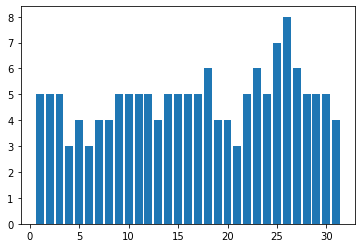

In [56]:
x_values = df['DAY']
y_values = df['FATALS']
plt.bar(x_values, y_values)
plt.show()
plt.close('all')

Anem a observar la frecuencia amb les seguents variables: 
    FATALS
    DRUNK_DE
    VE_TOTAL
    VE_FORMS
    PVH_INVL


count    35766.000000
mean         1.085500
std          0.342381
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: FATALS, dtype: float64


<AxesSubplot:xlabel='FATALS'>

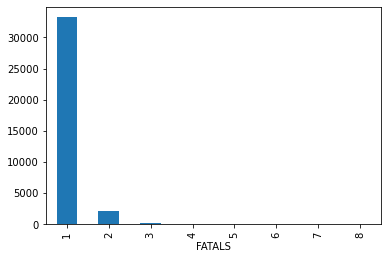

In [57]:
# S'observa que lo mes frecuent o el valor mes repetit es 1 
print(df['FATALS'].describe())
freq = df.groupby(['FATALS']).size() 
freq.plot.bar()

count    35766.000000
mean         0.266426
std          0.459707
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          4.000000
Name: DRUNK_DR, dtype: float64


<AxesSubplot:xlabel='DRUNK_DR'>

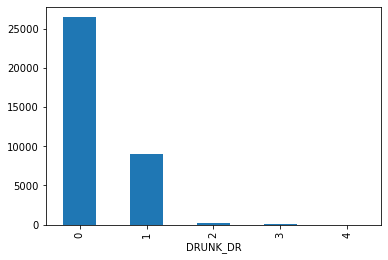

In [58]:
# S'observa que lo mes frecuent es cap 
print(df['DRUNK_DR'].describe())
freq = df.groupby(['DRUNK_DR']).size() 
freq.plot.bar()

count    35766.000000
mean         1.560113
std          0.782449
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: VE_TOTAL, dtype: float64


<AxesSubplot:xlabel='VE_TOTAL'>

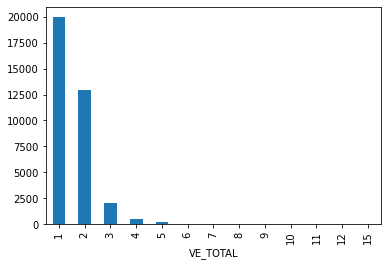

In [59]:
#Si s'observa la variable de vehicles totals implicats en un accident  en la gran majoria de casos son 1 o 2 cotxe, observant les dades es un promig de 1.56
print(df['VE_TOTAL'].describe())
freq = df.groupby(['VE_TOTAL']).size() 
freq.plot.bar()

count    35766.000000
mean         1.517419
std          0.736814
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: VE_FORMS, dtype: float64


<AxesSubplot:xlabel='VE_FORMS'>

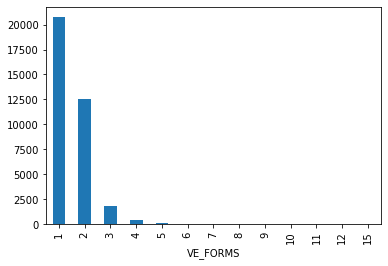

In [60]:
#Observem que hi ha 1.5 vehicles de mitja, un vehicle no pot ser mig aleshores serien 2 vehicles
print(df['VE_FORMS'].describe())
freq = df.groupby(['VE_FORMS']).size() 
freq.plot.bar()

count    35766.000000
mean         0.042694
std          0.292877
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: PVH_INVL, dtype: float64


<AxesSubplot:xlabel='PVH_INVL'>

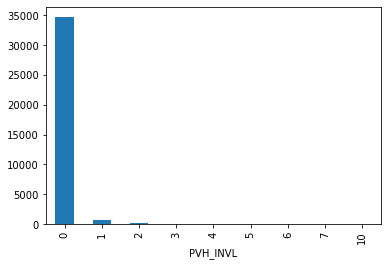

In [61]:
#En la gran majoria de casos no hi ha cap vehicle estacionat 
print(df['PVH_INVL'].describe())
freq = df.groupby(['PVH_INVL']).size() 
freq.plot.bar()

Seguidament mirarem les persones implicades en els accidents , anem a fer les visualitzacions corresponents

count    35766.000000
mean         0.228485
std          0.470604
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PEDS, dtype: float64


<AxesSubplot:xlabel='PEDS'>

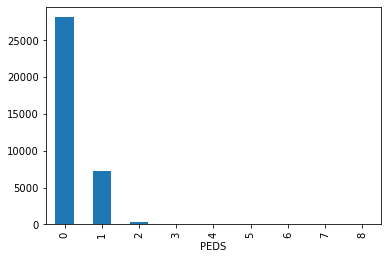

In [62]:
#En la gran majoria dels casos no hi ha cap persona que sigui vianants  com indica la mitja 
print(df['PEDS'].describe())
freq = df.groupby(['PEDS']).size() 
freq.plot.bar()

count    35766.000000
mean         2.172818
std          1.593437
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         61.000000
Name: PERSONS, dtype: float64


<AxesSubplot:xlabel='PERSONS'>

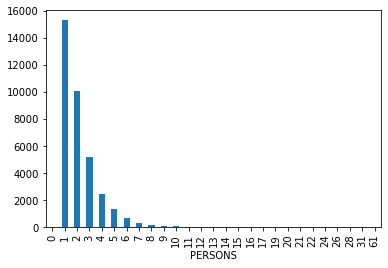

In [63]:
#En la gran majoria dels accidents trobem que hi han una mitjana de 2.17 ocupants
print(df['PERSONS'].describe())
freq = df.groupby(['PERSONS']).size() 
freq.plot.bar()

count    35766.000000
mean         2.162585
std          1.589051
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         61.000000
Name: PERMVIT, dtype: float64


<AxesSubplot:xlabel='PERMVIT'>

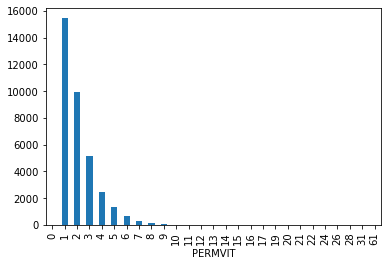

In [64]:
#S'observa que de mitja hi han 2.16  conductors i ocupants implicats en un accident
print(df['PERMVIT'].describe())
freq = df.groupby(['PERMVIT']).size() 
freq.plot.bar()


count    35766.000000
mean         0.238718
std          0.494223
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: PERNOTMVIT, dtype: float64


<AxesSubplot:xlabel='PERNOTMVIT'>

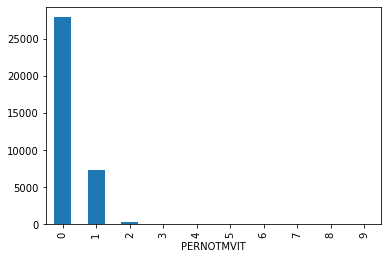

In [65]:
# S'estudia tota persona que implica no motoritzat, en la gran majoria dels casos son 0 pero podem trobar fins a 9 
print(df['PERNOTMVIT'].describe())
freq = df.groupby(['PERNOTMVIT']).size() 
freq.plot.bar()




Ara anem a veure la combinacio de morts fatals amb conductors veguts

count     35766
unique        2
top          NO
freq      26511
Name: DRUNK_DR_TF, dtype: object


<AxesSubplot:xlabel='DRUNK_DR_TF'>

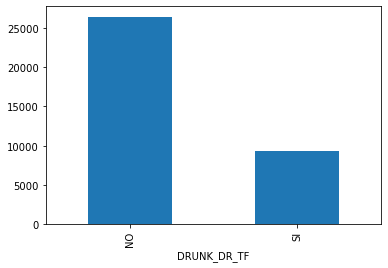

In [66]:
#Crearem una variable nova al dataframe per veure si eren conductos beguts o no . El valor 0 representa que no i 1 si.  UN 75 % dels accidents  no estan causats per conductors veguts  i el 25% restant si

df['DRUNK_DR_TF']= "NO"

for i in range(len(df)):
   a =  df.iloc[i]['DRUNK_DR']
   if a > 0 :
    df.loc[i, 'DRUNK_DR_TF'] = "SI"
  
print(df['DRUNK_DR_TF'].describe())


freq = df.groupby(['DRUNK_DR_TF']).size() 
freq.plot.bar()



Anem a observar la correlació de les dades amb una matriu, en aquest pas eligirem les variables del conjunt

In [151]:
df1 = df[['FATALS','DRUNK_DR','VE_TOTAL','VE_FORMS','PVH_INVL','PEDS','PERSONS','PERMVIT','PERNOTMVIT']]
print("Correlació primer dataframe")
print(df1.corr())
print("")

# Es crea una nova variable amb la suma de tots els individus , amb les variables persons + permvit

df['TOTAL_PERSONS']= 0

for i in range(len(df)):
   persons =  df.iloc[i]['PEDS']
   persons1 =  df.iloc[i]['PERMVIT']
   df.loc[i, 'TOTAL_PERSONS'] = persons+persons1

   
df2 = df[['FATALS','DRUNK_DR','VE_TOTAL','VE_FORMS','PVH_INVL','PEDS','TOTAL_PERSONS','PERSONS','PERMVIT','PERNOTMVIT']]
print("Correlació segon dataframe")
print(df2.corr)
print("")

#El conjunt de dades que agafarem per preedir el numero de morts es el seguent

print("Correlació tercer dataframe")
df3 = df[['DRUNK_DR','VE_TOTAL','VE_FORMS','PVH_INVL','TOTAL_PERSONS']]
print(df3.corr())


Correlació primer dataframe
              FATALS  DRUNK_DR  VE_TOTAL  VE_FORMS  PVH_INVL      PEDS  \
FATALS      1.000000  0.048722  0.130481  0.132417  0.015459 -0.062247   
DRUNK_DR    0.048722  1.000000 -0.023189 -0.030830  0.015610 -0.194928   
VE_TOTAL    0.130481 -0.023189  1.000000  0.927414  0.338424 -0.204354   
VE_FORMS    0.132417 -0.030830  0.927414  1.000000 -0.038106 -0.238065   
PVH_INVL    0.015459  0.015610  0.338424 -0.038106  1.000000  0.052968   
PEDS       -0.062247 -0.194928 -0.204354 -0.238065  0.052968  1.000000   
PERSONS     0.284210 -0.012359  0.631536  0.665099  0.013966 -0.221193   
PERMVIT     0.284496 -0.012794  0.622845  0.668735 -0.018400 -0.223874   
PERNOTMVIT -0.057668 -0.184322 -0.161039 -0.232475  0.154626  0.958868   

             PERSONS   PERMVIT  PERNOTMVIT  
FATALS      0.284210  0.284496   -0.057668  
DRUNK_DR   -0.012359 -0.012794   -0.184322  
VE_TOTAL    0.631536  0.622845   -0.161039  
VE_FORMS    0.665099  0.668735   -0.232475  
PVH_IN

Hara anirem a crear noves variables que ens ajudaran a entendre millor les variables 

count    35766.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: FATALS_TF, dtype: float64


<AxesSubplot:xlabel='FATALS_TF'>

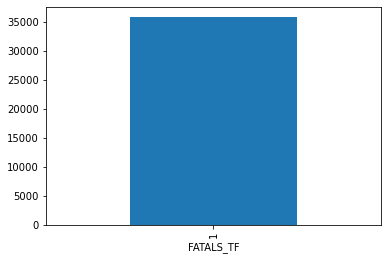

In [67]:
#Crearem una nova variable per saber si hi han morts, en aquest data set tot accident te morts axò si que ho podem afirmar


df['FATALS_TF']= 0

for i in range(len(df)):
   a =  df.iloc[i]['FATALS']
   if a > 0 :
    df.loc[i, 'FATALS_TF'] = 1
  
print(df['FATALS_TF'].describe())

freq = df.groupby(['FATALS_TF']).size() 
freq.plot.bar()

count           35766
unique              3
top       [0.33-0.66]
freq            19709
Name: RANGE_FATALS, dtype: object


<AxesSubplot:xlabel='RANGE_FATALS'>

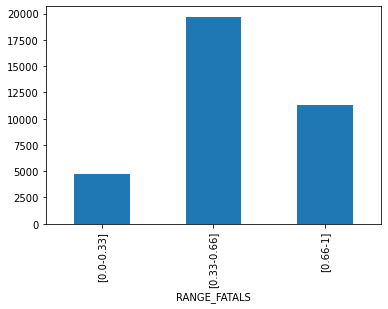

In [68]:
# Es crea un rate del % de nombres de morts, aquest rate esta compost entre persones mortes i el total de persones
df['RATE_FATALS']= 0
df['RANGE_FATALS']=''

for i in range(len(df)):
   fatals =  df.iloc[i]['FATALS']
   persons = df.iloc[i]['PERMVIT'] + df.iloc[i]['PERNOTMVIT']
   if(fatals > 0 ):
    df.loc[i, 'RATE_FATALS'] = float(fatals/persons)
    n = float(fatals/persons)
    if n >= 0.00 and n < 0.33 :
            df.loc[i, 'RANGE_FATALS']= "[0.0-0.33]"
    if n >= 0.33 and n < 0.66 :
            df.loc[i, 'RANGE_FATALS']= "[0.33-0.66]"
    
    if n >= 0.66  :
            df.loc[i, 'RANGE_FATALS']= "[0.66-1]"     
            
   
  
print(df['RANGE_FATALS'].describe())

aux = df[(df.RATE_FATALS>float(0))]

freq = df.groupby(['RANGE_FATALS']).size() 
freq.plot.bar()





Em la gran majoria del casos estan situats en l'interval 0.33-0.66, això vol dir que el 50% de persones implicades mort en l'accident  

<AxesSubplot:xlabel='RANGE_FATALS'>

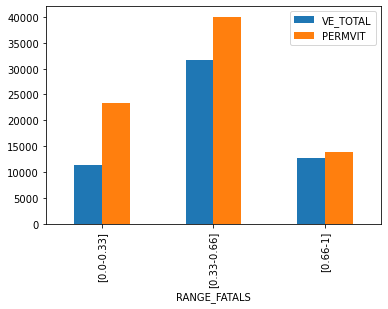

In [69]:
#Es crea un plot amb variable x = range fatals i com variable y = vehicles implicats i persones de vehicles implicades. S'observa que el rang de 0.33-0.66 es el que te mes persones y vehicles implicats


casos_edad = df.groupby(["RANGE_FATALS"]).sum(['VE_TOTAL','PERMVIT'])

casos_edad.plot.bar(y=['VE_TOTAL','PERMVIT'])

Realitzarem la discretitzacio, crearem una nova variable per saber a quina epoca del any hi han mes accidents: Hivern, Primavera, Estiu, Tardor

count     35766
unique        4
top       Estiu
freq      10323
Name: ESTACIO, dtype: object


<AxesSubplot:xlabel='ESTACIO'>

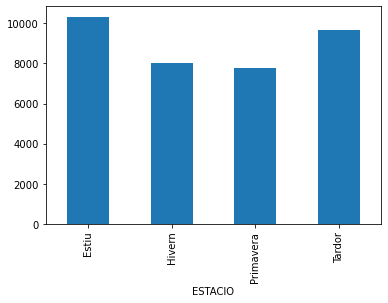

In [142]:
#Es pot observar que quan es estiu es quan hi han mes accidents de transit i aleshores mes mortalitat 
import datetime


for i in range(len(df)):
   dia =  int(df.iloc[i]['DAY'])
   mes = int(df.iloc[i]['MONTH'] )
   
   date = datetime.datetime.strptime('2020'+'-'+ str(mes)+'-'+ str(dia),'%Y-%m-%d')

  
   if (  date >= datetime.datetime.strptime('2020-03-26', "%Y-%m-%d")) and  (  date <= datetime.datetime.strptime('2020-06-21', "%Y-%m-%d")) : 
         df.loc[i, 'ESTACIO']= "Primavera"
   elif (  date >= datetime.datetime.strptime('2020-09-23', "%Y-%m-%d")) and  (  date <= datetime.datetime.strptime('2020-12-21', "%Y-%m-%d")) :
             df.loc[i, 'ESTACIO']= "Tardor"  
   elif (  date > datetime.datetime.strptime('2020-06-21', "%Y-%m-%d")) and  (  date < datetime.datetime.strptime('2020-09-21', "%Y-%m-%d")) :    
         df.loc[i, 'ESTACIO']= "Estiu"            
   elif (  date > datetime.datetime.strptime('2020-12-21', "%Y-%m-%d")) and  (  date < datetime.datetime.strptime('2020-03-26', "%Y-%m-%d")) :    
         df.loc[i, 'ESTACIO']= "Hivern"  
         
 

                 
print(df['ESTACIO'].describe())

freq = df.groupby(['ESTACIO']).size() 
freq.plot.bar()

  

Ara farem la normalitzacio de les dades seleccionades, data frame que utilitzarem sera el df3

In [157]:
#Aquests son les variables que elegim per el nostre dataset final, normalitzarem les dades utilitzant el minim i max
print(df3.columns.values)

df_min_max_scaled = df3.copy() 
  
for column in df_min_max_scaled.columns: 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     
  
print(df_min_max_scaled)
print(df_min_max_scaled.describe())



['DRUNK_DR' 'VE_TOTAL' 'VE_FORMS' 'PVH_INVL' 'TOTAL_PERSONS']
       DRUNK_DR  VE_TOTAL  VE_FORMS  PVH_INVL  TOTAL_PERSONS
0          0.25  0.000000  0.000000       0.0       0.050000
1          0.00  0.214286  0.214286       0.0       0.083333
2          0.00  0.071429  0.071429       0.0       0.016667
3          0.00  0.000000  0.000000       0.0       0.066667
4          0.00  0.000000  0.000000       0.0       0.000000
...         ...       ...       ...       ...            ...
35761      0.00  0.071429  0.071429       0.0       0.016667
35762      0.00  0.142857  0.142857       0.0       0.116667
35763      0.00  0.142857  0.142857       0.0       0.133333
35764      0.00  0.071429  0.071429       0.0       0.050000
35765      0.00  0.000000  0.000000       0.0       0.016667

[35766 rows x 5 columns]
           DRUNK_DR      VE_TOTAL      VE_FORMS      PVH_INVL  TOTAL_PERSONS
count  35766.000000  35766.000000  35766.000000  35766.000000   35766.000000
mean       0.066607      0

Ara es realitzara la classificació del model utilitzant la tècnica del pca

In [171]:
# S'escala la data
x_scaled = StandardScaler().fit_transform(df_min_max_scaled)


#Reduirem les components a 4 ja que el nombre de invidus no ens aportara molt en el nostre experiment 
pca = PCA(n_components=4)
 
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3','PC4'])

print(pca_df)

Shape before PCA:  (35766, 5)
Shape after PCA:  (35766, 4)
            PC1       PC2       PC3       PC4
0     -0.434527  0.195154 -1.506097  1.466795
1      5.094391 -0.811396  0.019831 -0.472084
2      0.619550 -0.279380  0.428470 -0.721200
3     -0.013589 -0.732841  0.484756  1.847395
4     -1.297014 -0.157266  0.603182 -0.307128
...         ...       ...       ...       ...
35761  0.619550 -0.279380  0.428470 -0.721200
35762  4.140396 -1.120964  0.105724  1.557881
35763  4.461252 -1.264857  0.076117  2.096511
35764  1.261263 -0.567168  0.369256  0.356061
35765 -0.976158 -0.301160  0.573576  0.231503

[35766 rows x 4 columns]


In [173]:
print('NumPy covariance matrix: \n%s' %np.cov(x_scaled.T))

# Es calcula els autovalors y autovectores de la matriu 

cov_mat = np.cov(x_scaled.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

NumPy covariance matrix: 
[[ 1.00002796 -0.02318966 -0.03083093  0.01561049 -0.07216359]
 [-0.02318966  1.00002796  0.92744009  0.33843395  0.57540523]
 [-0.03083093  0.92744009  1.00002796 -0.03810692  0.61214641]
 [ 0.01561049  0.33843395 -0.03810692  1.00002796 -0.00277647]
 [-0.07216359  0.57540523  0.61214641 -0.00277647  1.00002796]]
Eigenvectors 
[[-4.60077166e-02  9.28805825e-01  3.60451725e-01  7.26469750e-02
   1.76902417e-16]
 [ 6.11729021e-01 -1.54252887e-02  1.81336473e-01 -3.15108660e-01
  -7.02405354e-01]
 [ 5.99672558e-01  1.21440344e-01 -1.54713068e-01 -4.05224597e-01
   6.61439309e-01]
 [ 1.25647555e-01 -3.46727716e-01  8.73682545e-01  1.77613719e-01
   2.62915879e-01]
 [ 4.98273429e-01  4.59775276e-02 -2.23459872e-01  8.36465984e-01
   7.68794703e-16]]

Eigenvalues 
[ 2.44913334e+00  9.86982280e-01  1.08416987e+00  4.79854317e-01
 -5.78914113e-15]


Ordenarem una llista per veure que eigevenctor ens dona menys informació per eliminarlo

In [174]:

#  Es crea una lista de parelles (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos la llista
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la llista de autovalors 
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
2.4491333388214196
1.084169865599309
0.9869822800685817
0.47985431699258935
5.789141127286293e-15


Eliminant el tercer vector tindriem mes informació